In [1]:
import matplotlib.pyplot as plt
import pde
import numpy as np
import torch
from numpy import pi
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
#Create a separate function
def SolveKDV(var, eq, region=[[-pi, pi]], N=[128], ic="2/cosh(x)**2", istep=1e-2, t=2, dt=1e-2, save_gif=False, gif_name=None, tol=1e-9):
    eq = pde.PDE({var: eq})
    grid = pde.grids.CartesianGrid(region, N, periodic=True)
    
    init = pde.fields.ScalarField.from_expression(grid, ic)
    
    data = pde.MemoryStorage()
    
    trackers = [
        "progress",
        data.tracker(interval=istep)
    ]
    
    solver = pde.ExplicitSolver(eq, scheme='runge-kutta', backend='auto', adaptive=True, tolerance=tol)
    controller = pde.Controller(solver, t_range=t, tracker=trackers)
    sol = controller.run(init, dt=dt)

    if save_gif:
        pde.movie(data, filename=f"./kdv_plots/{gif_name}.gif", progress=True)
    
    return data, init

In [3]:
data1, grid1 = SolveKDV(
    'phi', '- 6 * phi * d_dx(phi) - laplace(d_dx(phi))',
    region=[[-pi,2*pi]],
    N=[256],
    ic='2*3/cosh(x)**2',
    istep=1e-4,
    t=1,
    dt=1e-4,
    save_gif=False, gif_name='test2'
)

  0%|          | 0/1.0 [00:00<?, ?it/s]

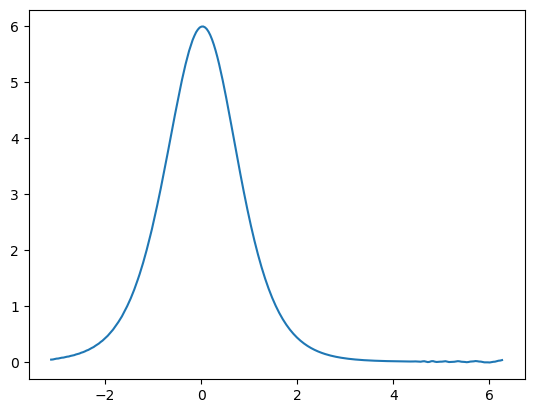

In [4]:
##This is for the x coord!!
plt.plot(grid1.get_line_data()["data_x"], data1.data[10])

In [5]:
x, t = np.meshgrid(grid1.get_line_data()["data_x"], data1.times)
z = np.array(data1.data)

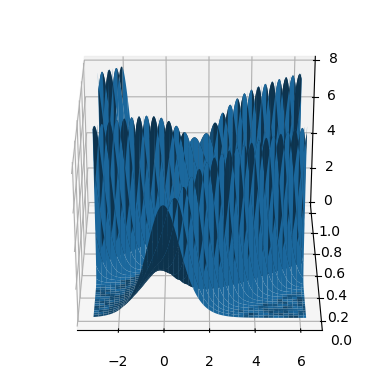

In [7]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
plot_solutions = ax.plot_surface(x,t,z)
ax.view_init(30,-90)
plt.show()